# 0.0. IMPORTS

In [88]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1. Helper Functions

In [91]:
sns.set(style="darkgrid")
plt.rc("figure", figsize=(20, 12))

## 0.2. Loading data

In [8]:
df_sales_raw = pd.read_csv("data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("data/store.csv", low_memory=False)

In [9]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df_sales_raw.shape

(1017209, 9)

In [12]:
df_store_raw.shape

(1115, 10)

In [13]:
# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how="left", on="Store")
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DOS DADOS

In [14]:
df1 = df_raw.copy()

In [15]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. Rename Columns

In [16]:
cols_old = df1.columns.to_list()
snakecase = lambda x: inflection.underscore( x )

cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

In [17]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimension

In [18]:
print("Number of Rows: {}".format( df1.shape[0] ))
print("Number of Columns: {}".format( df1.shape[1] ))

Number of Rows: 1017209
Number of Columns: 18


## 1.3. Data Types

In [19]:
df1["date"] = pd.to_datetime(df1["date"])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Chech NA

In [24]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
dtype: int64

## 1.5. Fillout NA

In [23]:
# competition_distance 
# O valor máximo desta coluna, sem imputação de valores, é 75860.0.
# Vamos imputar o valor 200.000 para ilustrar que não há competidores próximos.
df1["competition_distance"] = df1["competition_distance"].apply(lambda x:200000.0 if math.isnan( x ) else x )

# competition_open_since_month
df1["competition_open_since_month"] = df1.apply( lambda x:x["date"].month if math.isnan( x["competition_open_since_month"] ) else x["competition_open_since_month"], axis=1)

# competition_open_since_year 
df1["competition_open_since_year"] = df1.apply( lambda x:x["date"].year if math.isnan( x["competition_open_since_year"] ) else x["competition_open_since_year"], axis=1 ) 
                        
# promo2_since_week
df1["promo2_since_week"] = df1.apply( lambda x:x["date"].week if math.isnan( x["promo2_since_week"] ) else x["promo2_since_week"], axis=1 ) 

# promo2_since_year
df1["promo2_since_year"] = df1.apply( lambda x:x["date"].year if math.isnan( x["promo2_since_year"] ) else x["promo2_since_year"], axis=1 ) 

# promo_interval
month_map = {1:"Jan", 2:"Fev", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df1["promo_interval"].fillna(0, inplace=True)

df1["month_map"] = df1["date"].dt.month.map(month_map)

df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(",") else 0, axis=1)

In [38]:
df1.sample(5).T

,990146,125432,780698,702535,207845
store,812,553,984,871,456
day_of_week,5,5,4,4,1
date,2013-01-25 00:00:00,2015-04-10 00:00:00,2013-08-01 00:00:00,2013-10-10 00:00:00,2015-01-26 00:00:00
sales,7063,5427,6410,5520,6905
customers,843,556,768,424,933
open,1,1,1,1,1
promo,1,0,1,1,1
state_holiday,0,0,0,0,0
school_holiday,0,1,1,0,0
store_type,d,c,c,d,a


In [39]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [45]:
df1["competition_open_since_month"] =  df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"]  =  df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)


## 1.7. Descriptive Statistical

In [48]:
num_attributes = df1.select_dtypes(include=["int64", "float64"])
cat_attributes = df1.select_dtypes(exclude=["int64", "float64", "datetime64[ns]"])

### 1.7. Numerical Attributes

In [85]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x:x.max() - x.min()) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x:x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x:x.kurtosis() )).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

In [86]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


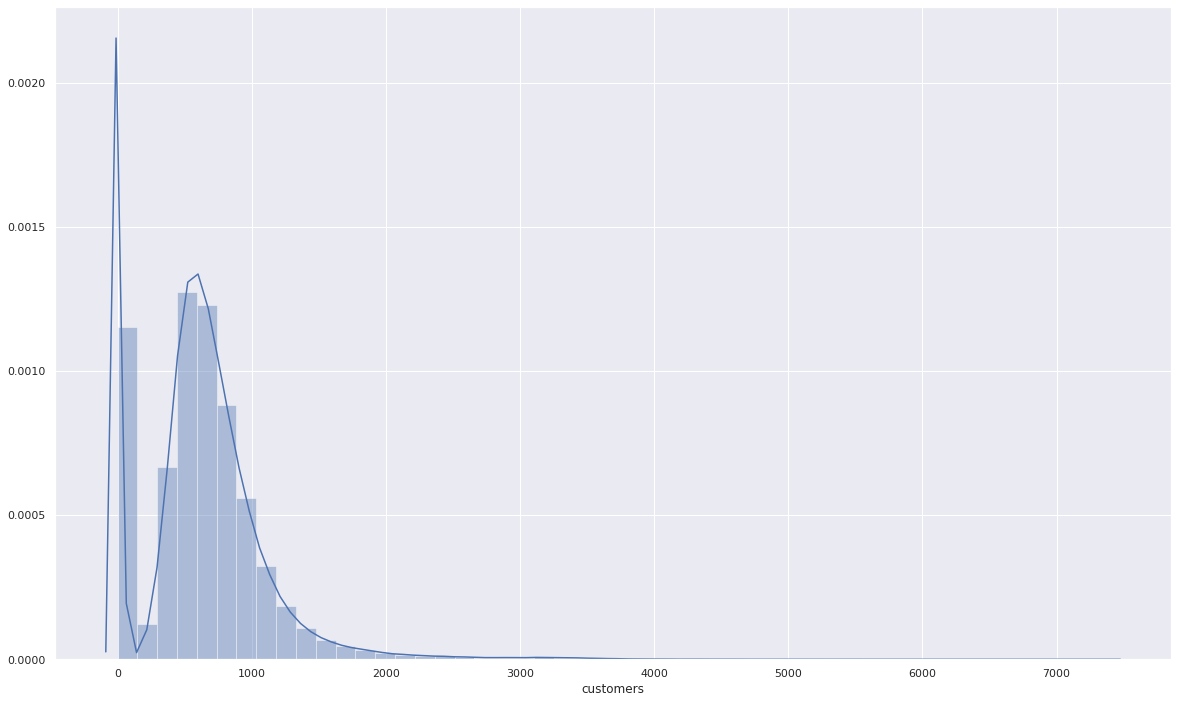

In [96]:
sns.distplot(df1["customers"])

### 1.7. Categorical Attributes

In [105]:
cat_attributes.apply( lambda x:x.nunique())

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

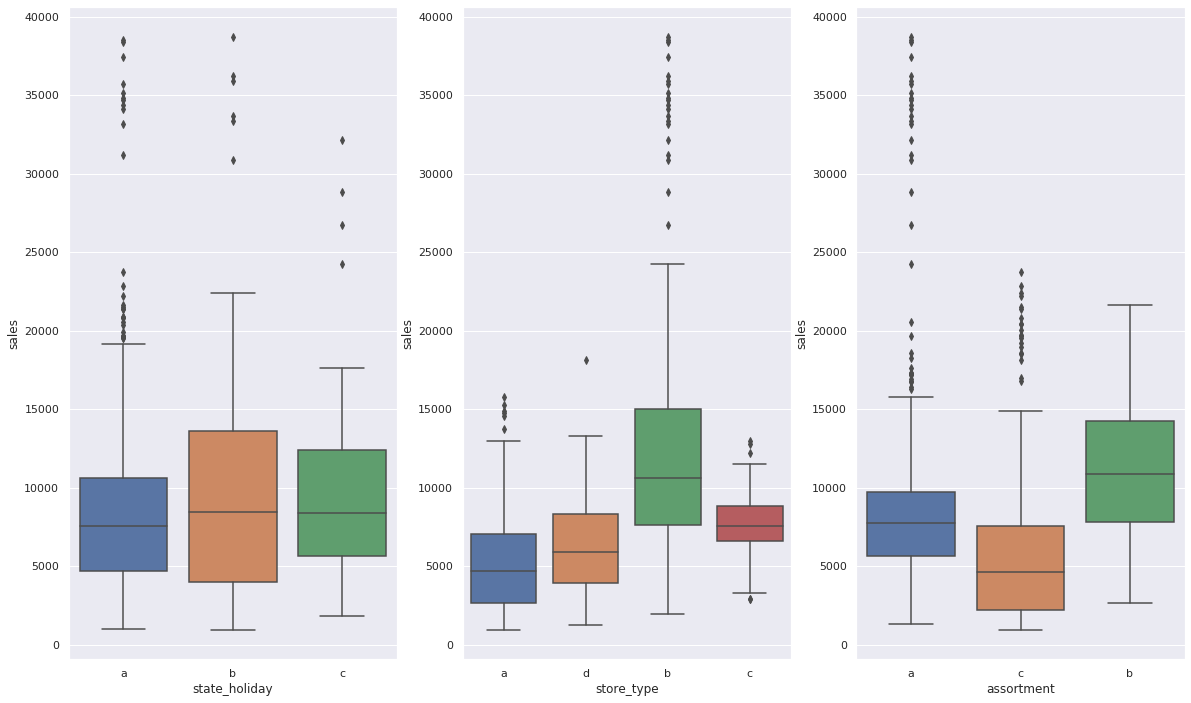

In [116]:
aux1 = df1[(df1["state_holiday"] != "0") & (df1["sales"] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x="state_holiday" , y="sales", data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x="store_type" , y="sales", data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x="assortment" , y="sales", data=aux1)

# 2.0 

# 1.1.

# 1.1.